# 🔎📊🧩 **Exploratory Data Analysis (EDA)**

<img src="../assets/banner_eda.jpg" style="width:95%">

_Estimated run time: **2min**_

This notebook provides a comprehensive and structured exploration of the dataset to uncover patterns, trends, and insights that `influence customer subscription behavior for term deposits at AI-Vive-Banking`. The analysis is designed to guide feature engineering, preprocessing, and modeling decisions, ensuring a robust and interpretable machine learning pipeline.

To ensure **clarity**, **consistency**, and **ease of navigation**, the following intuitive indicators have been adopted to categorize and guide the reader through the various stages of the analysis:

- **⬜ General Steps**: Core tasks such as data loading, inspection, and preprocessing to set up for analysis.

- **📊 Analytical Procedures**: Statistical tests, visualizations, and exploratory techniques to uncover patterns and relationships.

- **💡 Key Insights**: Actionable findings and hypotheses derived to guide feature engineering and modeling decisions.

- **🧼 Data Cleaning**: Addressing missing values, outliers, and inconsistencies to ensure data integrity and reliability.

- **🛠️ Feature Engineering**: Creating, transforming, and selecting features to enhance model performance and interpretability while reflecting domain knowledge.

- **❌ Ineffective Attempts**: Feature engineering efforts that did not yield improvements but are worth noting for transparency or future reference.

- **⚠️ Alerts**: Important notes or warnings highlighting challenges, limitations, or implications for the analysis and pipeline design.

---
---
---
# 🎯 **1. Introduction** 

---
## └─ **1.1. Project Goals**

This project aims to **predict client subscriptions to term deposits at AI-Vive-Banking using client attributes and marketing campaign data. Accurate predictions will help optimize marketing strategies, allocate resources effectively, and improve customer engagement.** `TO UPDATE`

The EDA focuses on three key areas:

- Data Overview: Assess dataset structure, quality, missing values, and outliers to ensure reliability for modeling.

- Feature Analysis: Examine feature-target relationships, distributions, and correlations to identify predictive signals.

- Pattern Recognition: Discover trends, behavioral patterns, and client segments to guide targeted marketing and enhance predictive accuracy.

Insights from this EDA will inform feature engineering, preprocessing, and model selection, enabling robust, interpretable machine learning aligned with business goals.

---
## └─ **1.2. Preliminary Understanding**

---
---
---
# **⚙️ 2. Project Setup**

---
### └─ **2.1. Import general libraries**

In [1]:
import os
import joblib
import yaml
import requests
from pathlib import Path

---
### └─ **2.2. Import and configure data libraries**

In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)  # Seed value for numpy.random for reproducibility

pd.set_option('max_colwidth', 40)  # Set the maximum width of each column to 40 characters for better readability
pd.set_option('display.max_columns', None)  # Display all columns in the output (instead of truncating them with "..." for wide DataFrames)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Limit float precision for cleaner output

---
### └─ **2.3. Import and configure visualization libraries**

In [3]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Use ggplot style for plots with a clean, professional look
plt.style.use('ggplot')  

# # Remove the spines (borders) of plots for a minimalist design
rcParams['axes.spines.right'] = False  # Remove the right spines (border) for a minimalist design
rcParams['axes.spines.top'] = False  # Remove the top spines (border) for a minimalist design
rcParams['figure.figsize'] = [12, 9]  # Set default figure size

%config InlineBackend.figure_format = 'retina'  # Enhance plot resolution for high-quality rendering on Retina displays

---
### └─ **2.4. Configure notebook interactivity**

In [4]:
import logging
import warnings
from IPython.core.interactiveshell import InteractiveShell

# Configure logging to display messages with level INFO and above, with a simple format
logging.basicConfig(
    level=logging.INFO,
    format="%(levelname)s: %(message)s"
)

# Hides warnings like deprecation notices or convergence warnings
warnings.filterwarnings('ignore')

# Configure IPython to display all expressions in a cell, not just the last one
# InteractiveShell.ast_node_interactivity = 'all'  # Postpone until after data download to avoid excessive outputs

# Disable Jedi autocompletion in IPython for faster tab completion
%config Completer.use_jedi = False  

---
### └─ **2.5. Configure relative imports**

In [5]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent  # if running from folder with parent directory as project root
sys.path.append(str(project_root))

---
### └─ **2.6. Get configurations from `config.yaml`**

In [6]:
from functions import load_config, load_csv_dataset

CONFIG_FILE = "../config.yaml"
REQUIRED_KEYS = ["data_file_path", "identifier_column", "target_column", "random_state", "test_size"]

config = load_config(CONFIG_FILE, required_keys=REQUIRED_KEYS)
DATA_FILE_PATH = Path("../", config["data_file_path"])
IDENTIFIER_COLUMN = config["identifier_column"]
TARGET_COLUMN = config["target_column"]
RANDOM_STATE = config["random_state"]
TEST_SIZE = config["test_size"]

INFO: ✅ Config loaded successfully from ..\config.yaml


---
### └─ **2.7. Load dataaset into Pandas DataFrame**

In [7]:
df = load_csv_dataset(DATA_FILE_PATH)
df.head()

INFO: ✅ Dataset loaded successfully from ..\data\mini_project_1_data.csv | Shape: (35680, 30)


,ID,URL,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,http://mashable.com/2013/01/07/amazo...,731.000,monday,593,12.000,219.000,0.664,1.000,0.815,4.000,2.000,1.000,0.000,0.000,4.680,entertainment,496.000,496.000,496.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,http://mashable.com/2013/01/07/ap-sa...,731.000,monday,711,9.000,255.000,0.605,1.000,0.792,3.000,1.000,1.000,NaN,28.000,4.914,business,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2,http://mashable.com/2013/01/07/apple...,731.000,monday,1500,9.000,211.000,0.575,1.000,0.664,3.000,1.000,1.000,0.000,15.000,4.393,business,918.000,918.000,918.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,http://mashable.com/2013/01/07/astro...,731.000,monday,1200,9.000,531.000,0.504,1.000,0.666,9.000,0.000,1.000,0.000,72.000,4.405,entertainment,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,4,http://mashable.com/2013/01/07/att-u...,731.000,monday,505,13.000,1072.000,0.416,1.000,0.541,19.000,19.000,20.000,NaN,20.000,4.683,technology,545.000,16000.000,3151.158,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


---
---
---
# **🔎 3. Basic Exploration**

- Insights from the basic exploration are captured here; the original analysis is in `basic_exploration.ipynb`.

- That notebook runs generic, reusable workflows, so it can be executed automatically without edits for fast analysis.

- This notebook focuses on project-specific, in-depth analysis, while only summarizing key findings from the basic exploration.

- [➡️ Go to the Data Cleaning Notebook](basic_exploration.ipynb)

---
---
---
# **🧼 4. Data Cleaning**

- Insights from the basic exploration are captured here; the original analysis is in `basic_exploration.ipynb`.

- That notebook runs generic, reusable workflows, so it can be executed automatically without edits for fast analysis.

- This notebook focuses on project-specific, in-depth analysis, while only summarizing key findings from the basic exploration.

In [8]:
from src.data_explorer import DataExplorer
from src.data_cleaner import DataCleaner

explorer = DataExplorer()
cleaner = DataCleaner(config=config)

🔎 Univariate Analysis for 'shares' (Type: numerical)

📘 Data Type: int64
💎 Unique Non-NA Values: 1418
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
shares,35680.00,3402.05,11934.88,4.00,946.00,1400.00,2800.00,843300.00


📈 Skewness: 34.41 ⚠️
📈 Kurtosis: 1827.97 ⚠️

🔍 Outlier Detection: IQR Method
   └── ⚠️ 4080 outliers found (11.43% of rows)


,shares
12,10000
15,13600
17,5700
18,17100
35,7700


✅ No rows with missing values found.


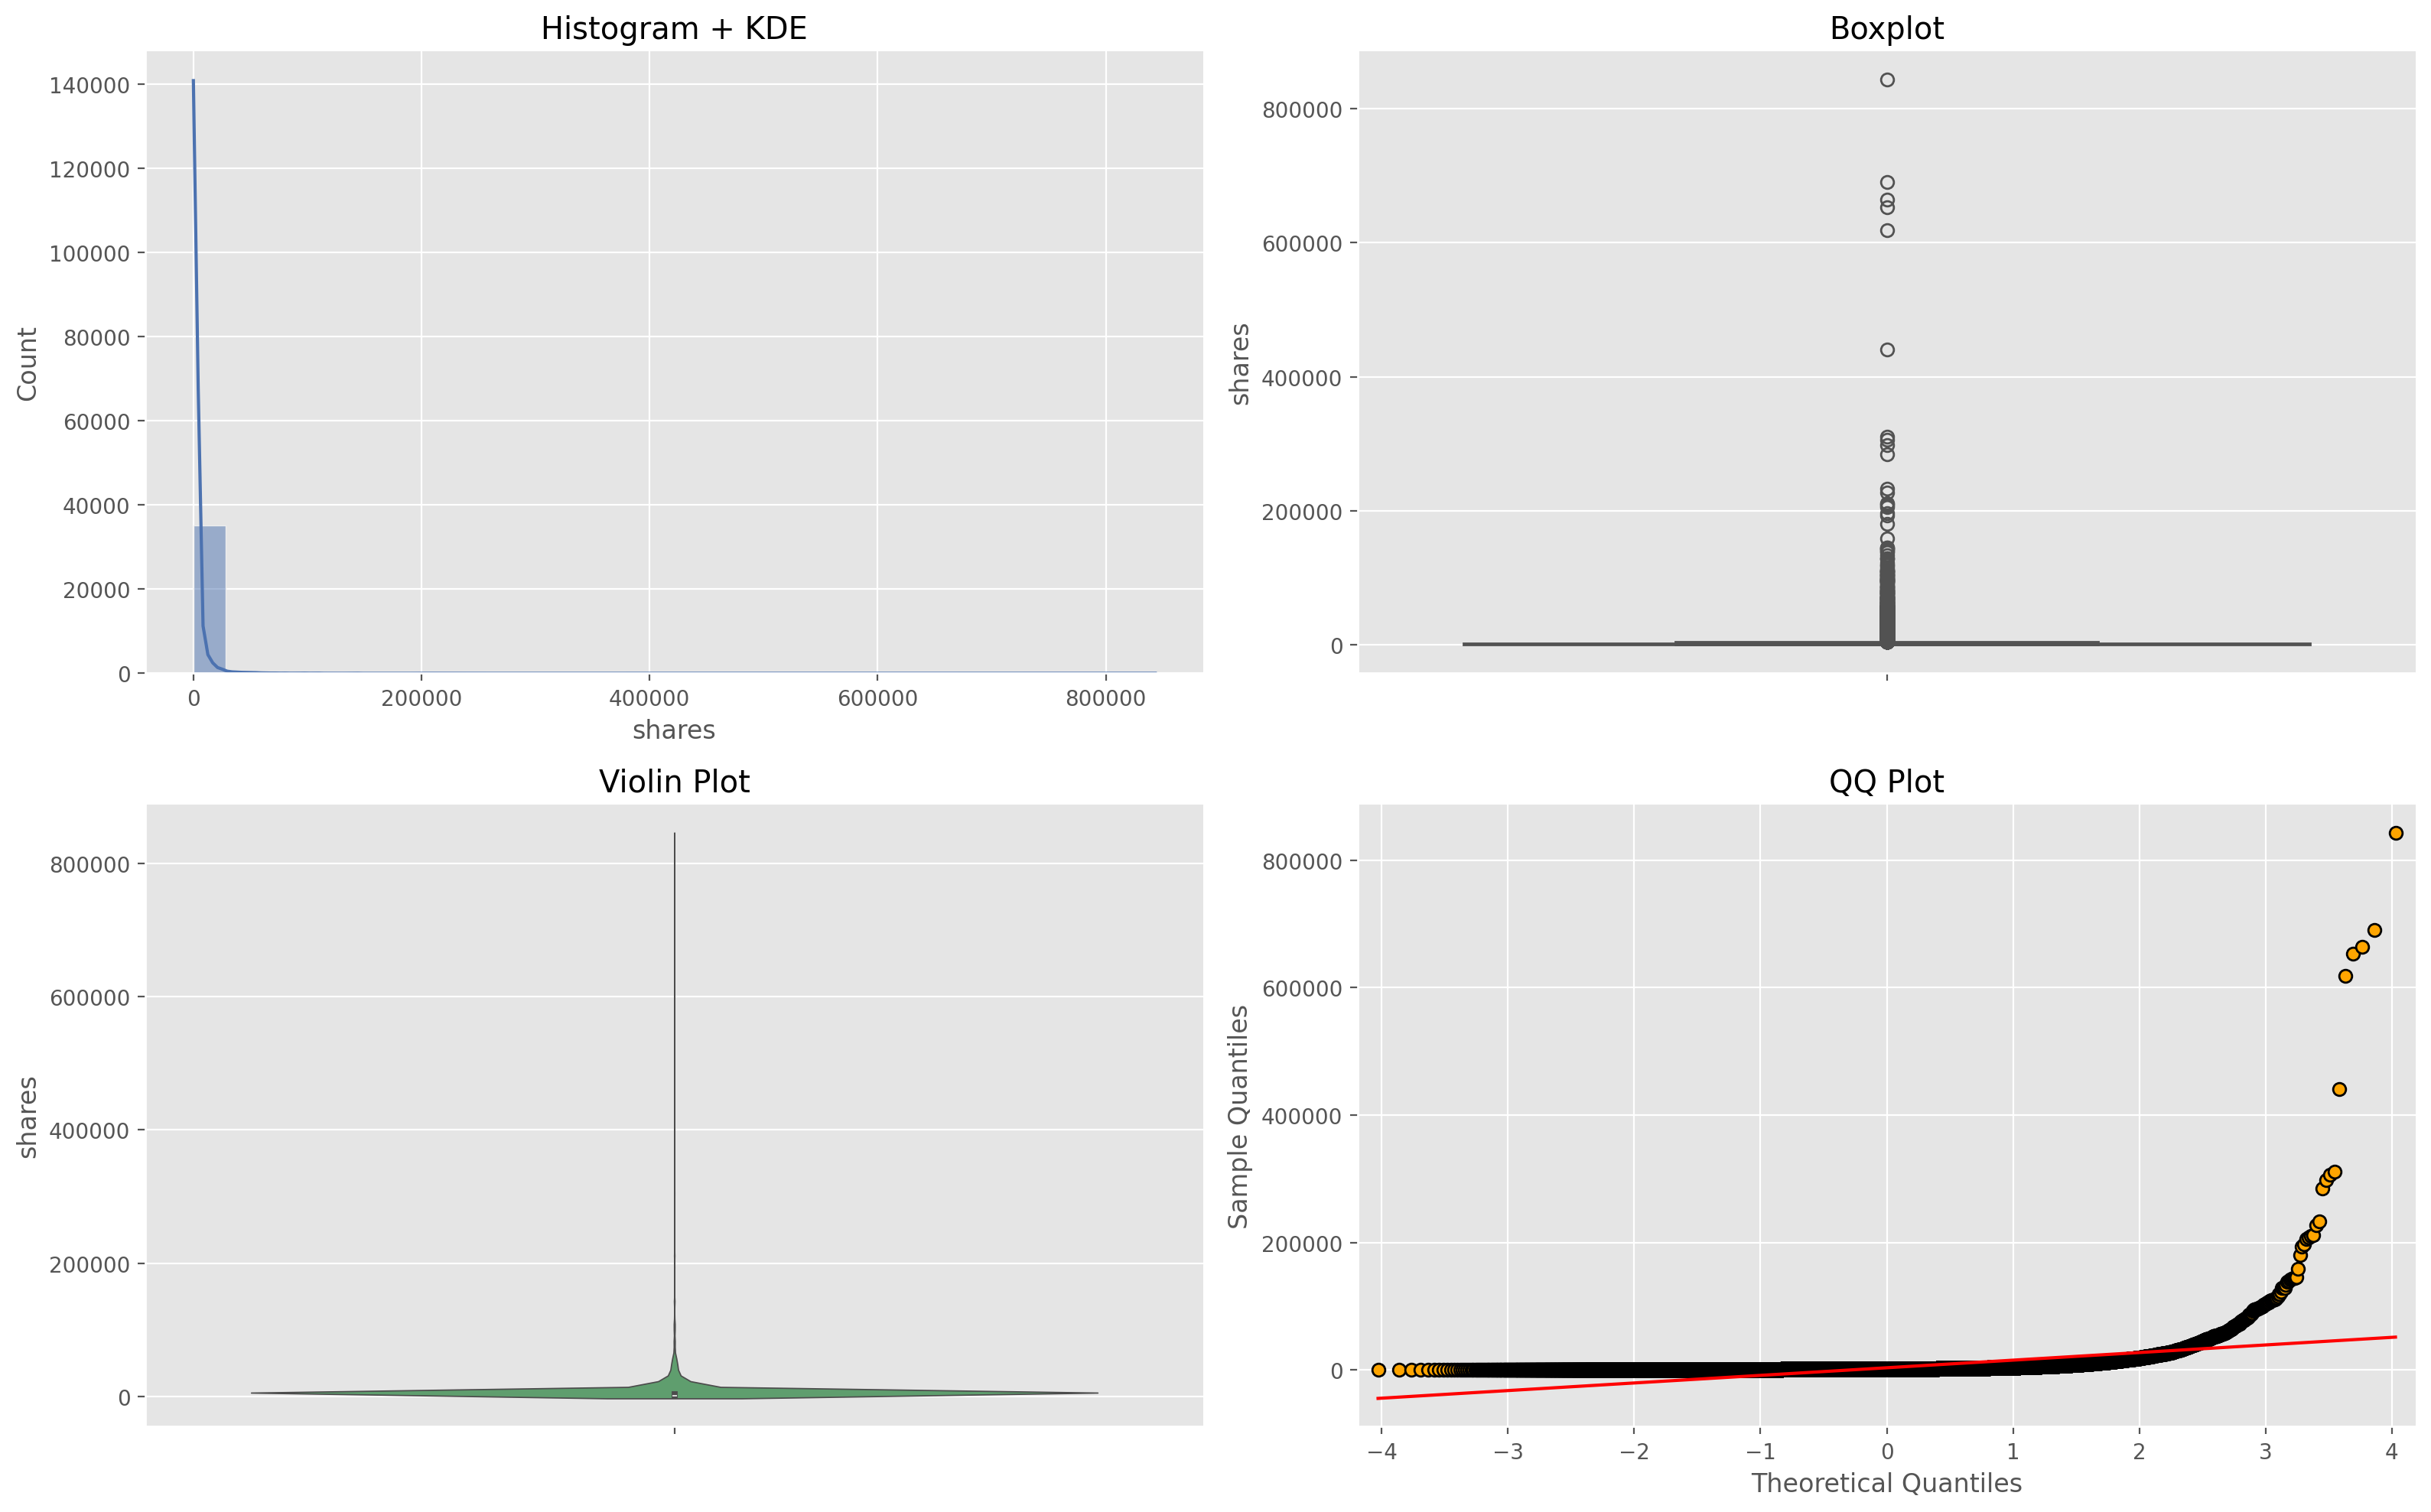

In [9]:
explorer.perform_univariate_analysis(df=df, feature="shares")

---
---
## └─ **4.1. Apply snake_case**



In [10]:
df_cleaned = cleaner.convert_column_names_to_snake_case(df=df, show=True)

   └── Converting column names to snake_case...

🫧 Cleaned DataFrame after applying snake_case to column names:


,id,url,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,http://mashable.com/2013/01/07/amazo...,731.000,monday,593,12.000,219.000,0.664,1.000,0.815,4.000,2.000,1.000,0.000,0.000,4.680,entertainment,496.000,496.000,496.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,http://mashable.com/2013/01/07/ap-sa...,731.000,monday,711,9.000,255.000,0.605,1.000,0.792,3.000,1.000,1.000,NaN,28.000,4.914,business,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2,http://mashable.com/2013/01/07/apple...,731.000,monday,1500,9.000,211.000,0.575,1.000,0.664,3.000,1.000,1.000,0.000,15.000,4.393,business,918.000,918.000,918.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,http://mashable.com/2013/01/07/astro...,731.000,monday,1200,9.000,531.000,0.504,1.000,0.666,9.000,0.000,1.000,0.000,72.000,4.405,entertainment,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,4,http://mashable.com/2013/01/07/att-u...,731.000,monday,505,13.000,1072.000,0.416,1.000,0.541,19.000,19.000,20.000,NaN,20.000,4.683,technology,545.000,16000.000,3151.158,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
